# Image Classification with ASL dataset
> NTNU CSIE Camp 2024

## 美國手語資料集

[美國手語字母表](http://www.asl.gs/) 含有 26 個字母。其中兩個字母（J 和 Z）需要移動，因此不會包含在訓練資料集中。

<img src = "./asl/american_sign_language.PNG" style="width: 600px;">

## 載入資料

> 我們資料集的取得方式 👉Kaggle  
> https://www.kaggle.com/datasets/datamunge/sign-language-mnist  

我們要將資料集化分為 `x_train`、`y_train`、`x_valid` 和 `y_valid` 變數

### 讀取資料

使用 Pandas 函式庫讀取 CSV file，透過 DataFrame 處理資料

In [1]:
import pandas as pd

train_df = pd.read_csv("asl/sign_mnist_train.csv")
valid_df = pd.read_csv("asl/sign_mnist_valid.csv")

### 探索資料

In [2]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### 擷取影像 label

In [3]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### 擷取影像資料

In [4]:
x_train = train_df.values # 取出數值 
x_valid = valid_df.values # 取出數值

### 總結訓練與驗證資料

In [5]:
x_train.shape

(27455, 784)

In [6]:
# TODO：查看訓練用的 label 資料尺寸
y_train.shape

(27455,)

In [7]:
# TODO：查看評估用的圖像資料尺寸
x_valid.shape

(7172, 784)

In [8]:
y_valid.shape

(7172,)

### 視覺化資料

把資料（image）1D to 2D

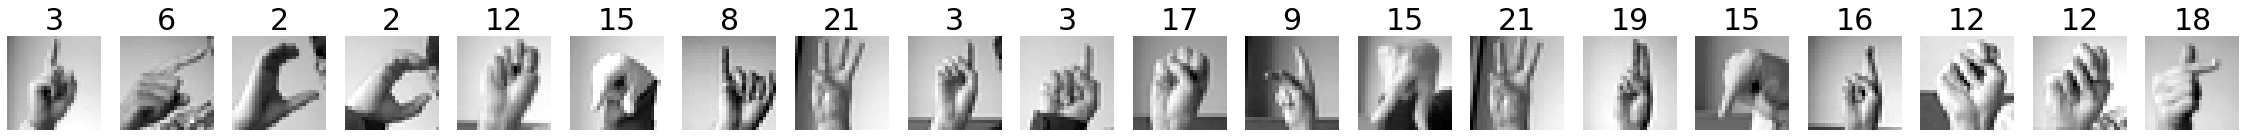

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## 資料前處理

### 正規化影像資料

In [10]:
# TODO：x_train 當中的最小值
x_train.min()

0

In [11]:
# TODO：x_train 當中的最大值
x_train.max()

255

In [12]:
# TODO: Normalize x_train and x_valid.
x_train_normalize = x_train / 255
x_valid_normalize = x_valid / 255

### 影像分類

In [13]:
# TODO：有幾個類別呢
import tensorflow.keras as keras
num_classes = 24

In [14]:
# TODO: Categorically encode y_train and y_valid.
y_train_class = keras.utils.to_categorical(y_train, num_classes)
y_valid_class = keras.utils.to_categorical(y_valid, num_classes)

## 模型

### 建立模型

We need...
* 具有密集輸入層。這一層包含 512 個神經元，使用 `relu` 激活函數，並接收形狀為 `(784,)` 的輸入影像。
* 具有第二個密集輸入層，含有 512 個使用 `relu` 激活函數的神經元
* 具有密集輸出層，其神經元的數量與類別數量相等，並使用 `softmax` 激活函數

還不熟悉，參考一下 MNIST 的範例吧～

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# TODO: build a model following the guidelines above.
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

### 總結模型

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 24)                12312     
                                                                 
Total params: 1,202,200
Trainable params: 1,202,200
Non-trainable params: 0
_________________________________________________________________


### 編寫模型

使用 [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### 訓練模型

使用模型的 `fit`方法來對模型進行訓練，使用的是先前建立的訓練與驗證影像和類別：

In [19]:
# TODO: Train the model.
history = model.fit(x_train_normalize, 
                    y_train_class, 
                    validation_split=1, 
                    epochs=5, 
                    verbose=1, 
                    #batch_size=5, 
                    validation_data=(x_valid_normalize, y_valid_class))

Epoch 1/5
858/858 [==============================] - 11s 13ms/step - loss: 2.2952 - accuracy: 0.2747 - val_loss: 1.9922 - val_accuracy: 0.3692
Epoch 2/5
858/858 [==============================] - 10s 12ms/step - loss: 1.2447 - accuracy: 0.5838 - val_loss: 1.5313 - val_accuracy: 0.5290
Epoch 3/5
858/858 [==============================] - 10s 12ms/step - loss: 0.7982 - accuracy: 0.7397 - val_loss: 0.7239 - val_accuracy: 0.7663
Epoch 4/5
858/858 [==============================] - 10s 12ms/step - loss: 0.5697 - accuracy: 0.8246 - val_loss: 1.6556 - val_accuracy: 0.6152
Epoch 5/5
858/858 [==============================] - 10s 12ms/step - loss: 0.4651 - accuracy: 0.8715 - val_loss: 0.9218 - val_accuracy: 0.7949


Model Loss Plot

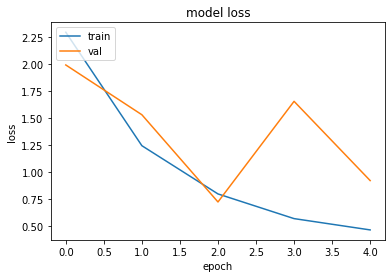

In [20]:
# TODO：繪製圖表觀察每個 epoch 對應的 model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model Accuracy Plot

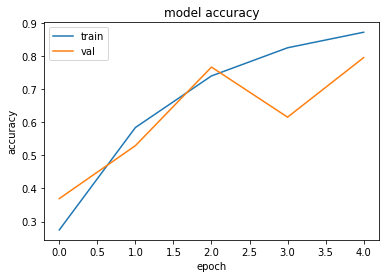

In [21]:
# TODO：繪製圖表觀察每個 epoch 對應的 model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion Matrix

225/225 [==============================] - 1s 3ms/step


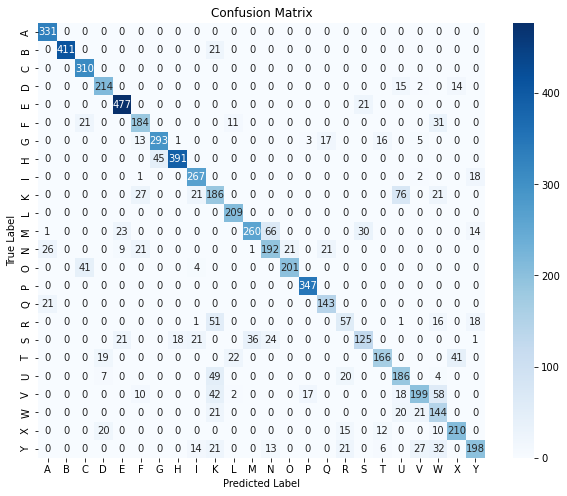

In [22]:
# TODO：繪製 Confusion Matrix 觀察模型在各個類別的預測表現
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_valid_normalize)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_valid_class, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 遇到了甚麼問題？
https://ithelp.ithome.com.tw/m/articles/10203371

## 使用模型

### 儲存模型

In [23]:
# TODO
model.save("model/asl-ans.h5")

### 載入模型

In [24]:
# TODO
model_load = keras.models.load_model("model/asl-ans.h5")
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 24)                12312     
                                                                 
Total params: 1,202,200
Trainable params: 1,202,200
Non-trainable params: 0
_________________________________________________________________


### 預測圖像
先拿資料集當中的圖片來試試

查看圖像

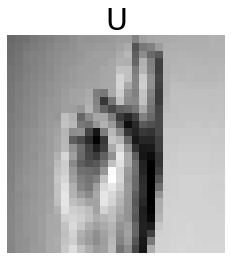

In [36]:
import matplotlib.pyplot as plt

row = x_valid[513]
label = y_valid[513]

# TODO 
def label_to_letter(num):
    mapping = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
        7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O',
        14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V',
        21: 'W', 22: 'X', 23: 'Y'
    }
    return mapping.get(num, 'Invalid number')
###

image = row.reshape(28,28)
plt.title(label_to_letter(label), fontdict={'fontsize': 30})
plt.axis('off')
plt.imshow(image, cmap='gray')

查看圖像的資料型態

In [37]:
predict_img_origin = x_valid[513]
print(f"這張圖片的資料尺寸：{predict_img_origin.shape}") # TODO
print(f"這張圖片的資料型態：{predict_img_origin.dtype}") # TODO

這張圖片的資料尺寸：(784,)
這張圖片的資料型態：int64


圖像資料前處理

In [38]:
# TODO：用一行將圖像正規化、調整成模型要的輸入尺寸 (1,784)、轉換型態為 float32
predict_img = (predict_img_origin/255).reshape(1,784).astype("float32")
predict_img

array([[0.5176471 , 0.5254902 , 0.53333336, 0.54901963, 0.5568628 ,
        0.5647059 , 0.5764706 , 0.5803922 , 0.5921569 , 0.6039216 ,
        0.6       , 0.6039216 , 0.60784316, 0.6156863 , 0.62352943,
        0.62352943, 0.5686275 , 0.627451  , 0.6392157 , 0.64705884,
        0.64705884, 0.6509804 , 0.654902  , 0.654902  , 0.654902  ,
        0.654902  , 0.6627451 , 0.65882355, 0.52156866, 0.53333336,
        0.54509807, 0.5529412 , 0.56078434, 0.57254905, 0.58431375,
        0.5882353 , 0.59607846, 0.60784316, 0.6117647 , 0.6156863 ,
        0.61960787, 0.61960787, 0.63529414, 0.6509804 , 0.4745098 ,
        0.54509807, 0.5647059 , 0.61960787, 0.654902  , 0.65882355,
        0.65882355, 0.65882355, 0.65882355, 0.65882355, 0.6627451 ,
        0.6627451 , 0.5254902 , 0.5372549 , 0.5568628 , 0.5647059 ,
        0.5686275 , 0.5803922 , 0.5882353 , 0.59607846, 0.6       ,
        0.60784316, 0.61960787, 0.627451  , 0.627451  , 0.627451  ,
        0.6509804 , 0.6745098 , 0.49411765, 0.58

預測圖像

In [39]:
# TODO
import numpy as np

predictions = model_load.predict(predict_img)
predicted_classes = np.argmax(predictions, axis=1)

# TODO 
def label_to_letter(num):
    mapping = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
        7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O',
        14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V',
        21: 'W', 22: 'X', 23: 'Y'
    }
    return mapping.get(num, 'Invalid number')
###

print(f"預測結果數值：{predictions}")
print(f"預測的結果類別：{label_to_letter(predicted_classes[0])}")

1/1 [==============================] - 0s 31ms/step
預測結果數值：[[1.71005667e-07 2.16070302e-02 3.13837778e-09 1.29192695e-03
  5.02465234e-08 9.45385466e-07 4.24081250e-08 1.52156736e-06
  8.21015856e-05 3.83524925e-01 1.72452519e-06 4.06673325e-06
  5.28046257e-05 1.00673381e-08 9.15088627e-09 1.05832264e-07
  1.14740792e-03 4.94746040e-08 1.40686339e-07 5.78259885e-01
  4.72375751e-03 9.25510004e-03 6.63018227e-08 4.62059797e-05]]
預測的結果類別：U


### 預測自己拍攝的照片

載入與查看圖片

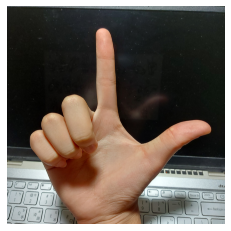

In [40]:
from PIL import Image
from matplotlib import pyplot as plt

image_dir = 'images/L.jpg'
image = Image.open(image_dir)
image = image.transpose(Image.ROTATE_270)

plt.imshow(image)
plt.axis('off')  # 不顯示座標軸
plt.show()

將圖像前處理

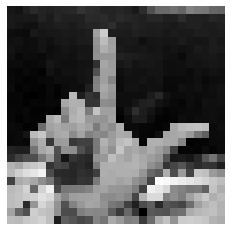

In [41]:
import cv2
import numpy as np

image = cv2.imread(image_dir)
image_resized = cv2.resize(image, (28, 28))
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
predict_img = (image_gray/255).reshape(1,784).astype('float32')

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

預測圖像

In [42]:
predictions = model_load.predict(predict_img)
predicted_classes = np.argmax(predictions, axis=1)

def label_to_letter(num):
    mapping = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
        7: 'H', 8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O',
        14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V',
        21: 'W', 22: 'X', 23: 'Y'
    }
    return mapping.get(num, 'Invalid number')


print(f"預測結果數值：{predictions}")
print(f"預測的結果類別：{label_to_letter(predicted_classes[0])}")

1/1 [==============================] - 0s 22ms/step
預測結果數值：[[4.86384270e-05 3.57228369e-02 1.68494559e-12 7.48144824e-10
  3.90192961e-10 1.14697540e-11 4.84959006e-09 3.21427047e-01
  4.82718468e-01 4.81279660e-03 6.93498425e-10 1.73330977e-06
  1.18354306e-04 2.31493313e-09 1.31020119e-12 1.28436595e-10
  7.42804818e-03 1.52759105e-06 1.71921748e-08 2.29763500e-05
  8.38920096e-05 4.80068729e-06 2.65466010e-10 1.47608832e-01]]
預測的結果類別：I
